In [18]:
# Imports

import pandas as pd
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import kaleido
import prince

In [2]:
df = pd.read_csv('source/RH_db.csv')

In [3]:
df.head()

,ID,Previous_company,Email Address,FirstName LastName,Phone,Deptmt,Job Title,Corporate,anciennete,Salary,Residence,Gender,Uni_name
0,1,Mars,Miley_Hall4430@bulaffy.com,Miley Hall,2-646-522-0567,Property department,Production Painter,Research and Development,7,33002,San Antonio,Female,"University of Maryland, College Park"
1,2,Facebook,Katelyn_Lomax452@brety.org,Katelyn Lomax,7-542-822-3468,Legal and public relation department,Project Manager,Finance,23,37895,Glendale,Female,University of Wisconsin-Madison
2,3,DynCorp,Brooklyn_Walton5446@guentu.biz,Brooklyn Walton,8-264-282-3065,Property department,Assistant Buyer,IT,11,39026,Indianapolis,Female,University of Miami
3,4,Carrefour,Mavis_Doherty2230@joiniaa.com,Mavis Doherty,7-511-887-8300,Personnel Department,Auditor,Human Resources,20,43741,San Antonio,Female,Boston College
4,5,Mars,Sage_Latham9509@ubusive.com,Sage Latham,3-762-713-4033,Non-Store Operations,Cash Manager,Marketing,22,45222,San Bernardino,Female,Case Western Reserve University


In [4]:
X = df['anciennete'].values
Y = df['Salary'].values
X = X.reshape(1000, 1)
Y = Y.reshape(1000, 1)

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.0007807912305437537

In [5]:
result = sm.OLS(df['Salary'], df['anciennete']).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.701
Model:                            OLS   Adj. R-squared (uncentered):              0.700
Method:                 Least Squares   F-statistic:                              2337.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                   8.25e-264
Time:                        10:52:26   Log-Likelihood:                         -11364.
No. Observations:                1000   AIC:                                  2.273e+04
Df Residuals:                     999   BIC:                                  2.273e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
anciennete  1986.7305     41.098     48.342      0.000    1906.083    2067.378
==============================================================================
Omnibus:                      169.746   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.334
Skew:                           0.049   Prob(JB):                     4.74e-09
Kurtosis:                       2.046   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
df['Salary'].corr(df['anciennete'])

-0.02794264179607573

In [7]:
df[df.columns].corr()['Salary']

ID           -0.017725
anciennete   -0.027943
Salary        1.000000
Name: Salary, dtype: float64

In [8]:
cor_mat = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
cor_mat

,ID,Previous_company,Email Address,FirstName LastName,Phone,Deptmt,Job Title,Corporate,anciennete,Salary,Residence,Gender,Uni_name
ID,1.000000,0.021010,1.000000,0.999997,1.000000,0.037867,0.131264,0.012753,0.013225,0.988953,0.140153,-0.011125,0.147788
Previous_company,0.021010,1.000000,0.021010,0.020980,0.021010,0.031174,0.018260,-0.022944,0.026835,0.023622,-0.042744,-0.020549,0.024858
Email Address,1.000000,0.021010,1.000000,0.999997,1.000000,0.037867,0.131264,0.012753,0.013225,0.988953,0.140153,-0.011125,0.147788
FirstName LastName,0.999997,0.020980,0.999997,1.000000,0.999997,0.037750,0.131309,0.012713,0.013233,0.988943,0.140027,-0.011094,0.147768
Phone,1.000000,0.021010,1.000000,0.999997,1.000000,0.037867,0.131264,0.012753,0.013225,0.988953,0.140153,-0.011125,0.147788
Deptmt,0.037867,0.031174,0.037867,0.037750,0.037867,1.000000,0.027911,-0.052280,-0.009265,0.036079,-0.022742,-0.011682,-0.017258
Job Title,0.131264,0.018260,0.131264,0.131309,0.131264,0.027911,1.000000,0.002169,0.056528,0.131844,0.066590,0.051198,0.058996
Corporate,0.012753,-0.022944,0.012753,0.012713,0.012753,-0.052280,0.002169,1.000000,0.008734,0.010189,0.025593,0.013905,-0.028095
anciennete,0.013225,0.026835,0.013225,0.013233,0.013225,-0.009265,0.056528,0.008734,1.000000,0.010924,0.013226,0.061487,-0.008866
Salary,0.988953,0.023622,0.988953,0.988943,0.988953,0.036079,0.131844,0.010189,0.010924,1.000000,0.144217,-0.011531,0.150388


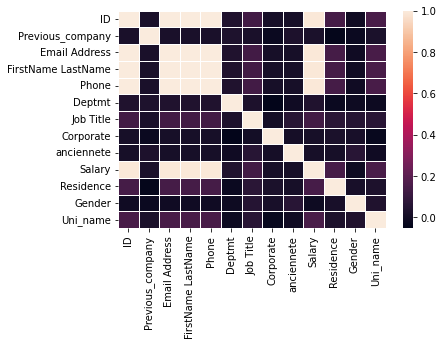

In [9]:
ax = sns.heatmap(cor_mat, linewidth=0.5)
plt.show()

In [10]:
df_by_job = df.groupby('Job Title').mean()
df_by_job.drop(columns=['ID'], inplace=True)
df_by_job.sort_values(by='Salary', ascending=False, inplace=True)
df_by_job

,anciennete,Salary
Job Title,,
IT Support Staff,11.666667,42252.888889
Restaurant Manager,13.000000,41332.736842
Ambulatory Nurse,12.692308,41035.692308
Call Center Representative,17.000000,40978.444444
Banker,15.111111,40891.888889
Audiologist,11.214286,40858.285714
Pharmacist,15.333333,40761.133333
Business Broker,17.769231,40571.615385
Healthcare Specialist,11.812500,39825.375000


In [11]:
df_by_corpo = df.groupby('Corporate').mean()
df_by_corpo.drop(columns=['ID'], inplace=True)
df_by_corpo.sort_values(by='Salary', ascending=False, inplace=True)
df_by_corpo

,anciennete,Salary
Corporate,,
Purchasing,13.358025,38453.765432
Management,13.459184,38338.642857
Operations,14.230769,38257.461538
Accounting,13.761905,37459.133333
Research and Development,14.288660,37312.587629
IT,14.939394,37242.151515
Finance,12.586538,36946.961538
Sales,13.577586,36855.698276
Human Resources,13.460177,36813.982301


In [12]:
df_by_pcomp = df.groupby('Previous_company').mean()
df_by_pcomp.drop(columns=['ID'], inplace=True)
df_by_pcomp.sort_values(by='Salary', ascending=False, inplace=True)
df_by_pcomp

,anciennete,Salary
Previous_company,,
Demaco,12.720000,39729.040000
UPC,9.485714,39124.342857
BuzzFeed,12.250000,39035.388889
Vodafone,15.131579,38635.052632
Facebook,15.933333,38600.966667
Erickson,15.760000,38335.280000
Leadertech Consulting,13.333333,38279.606061
Mars,12.358974,38162.692308
Team Guard SRL,13.918919,37971.810811


In [19]:
df['Previous_company'] = df['Previous_company'].astype('category')
df['Deptmt'] = df['Deptmt'].astype('category')
df['Job Title'] = df['Job Title'].astype('category')
df['Corporate'] = df['Corporate'].astype('category')
df['Residence'] = df['Residence'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Uni_name'] = df['Uni_name'].astype('category')

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (0.61% inertia)', ylabel='Component 1 (0.60% inertia)'>

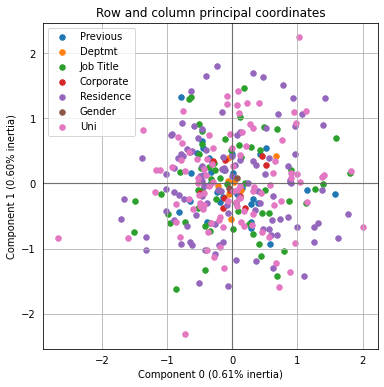

In [23]:
mca = prince.MCA(n_components=2, n_iter=3, copy=True, check_input=True, engine='auto', random_state=42)
mca.fit(df[['Previous_company', 'Deptmt', 'Job Title', 'Corporate', 'Residence', 'Gender', 'Uni_name']])
mca.plot_coordinates(df[['Previous_company', 'Deptmt', 'Job Title', 'Corporate', 'Residence', 'Gender', 'Uni_name']], ax=None, figsize=(6, 6), x_component=0, y_component=1, show_row_points=False, row_points_size=10, show_row_labels=False, show_column_points=True, column_points_size=30, show_column_labels=False, legend_n_cols=1)

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (2.68% inertia)', ylabel='Component 1 (2.64% inertia)'>

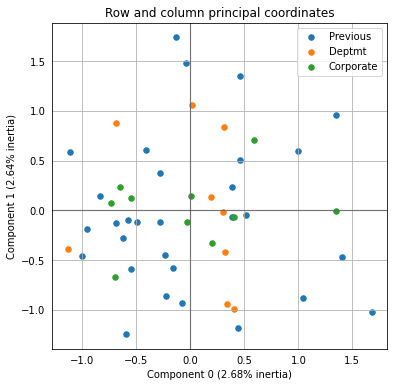

In [25]:
mca.fit(df[['Previous_company', 'Deptmt', 'Corporate']])
mca.plot_coordinates(df[['Previous_company', 'Deptmt', 'Corporate']], ax=None, figsize=(6, 6), x_component=0, y_component=1, show_row_points=False, row_points_size=10, show_row_labels=False, show_column_points=True, column_points_size=30, show_column_labels=False, legend_n_cols=1)

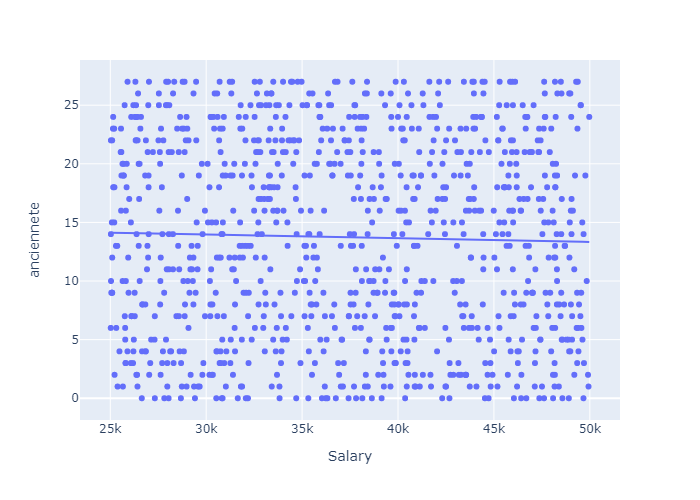

In [27]:
fig = px.scatter(df, x="Salary", y="anciennete", trendline='ols')
fig.show(renderer='png')

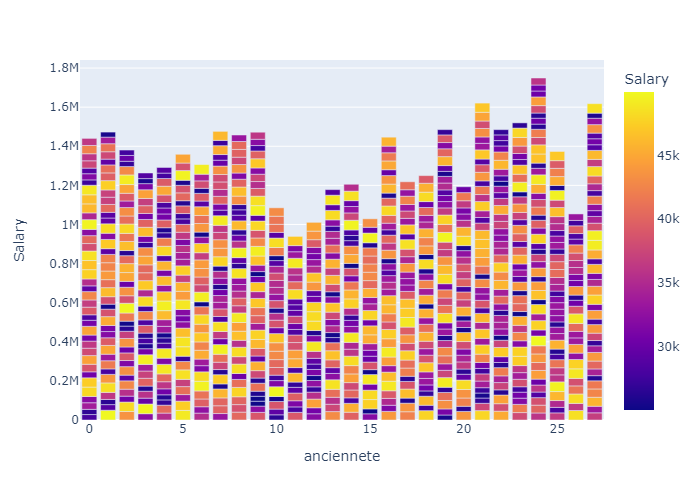

In [16]:
fig = px.bar(df, x="anciennete", y="Salary", color=df['Salary'])
fig.show(renderer='png')